In [1]:

import random as pyrandom
figsize(8,8)
matplotlib.rc("image",cmap="gray")
matplotlib.rc("image",interpolation="nearest")

In [2]:

ccolors = ['c+','g+','b+','y+','r+','m+','b+','orange+', 'brown+', 'lime+']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'b+')
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)])

Let's look at the origin of clusters in data.

Data is frequently composed of some prototypes corrupted by noise.

Let's start with prototypes for an OCR problem.

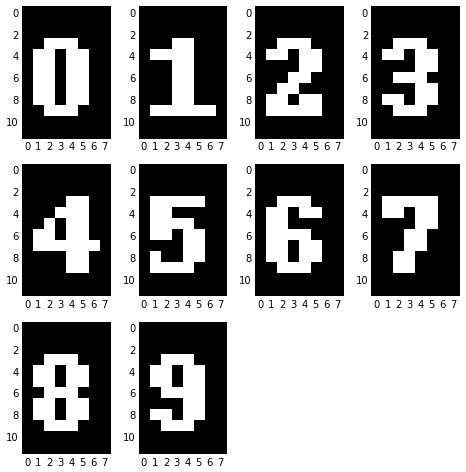

In [3]:
from PIL import Image,ImageFont,ImageDraw
font = ImageFont.load_default()
prototypes = []
for i in range(10):
    p = Image.new("L",(8,12))
    d = ImageDraw.Draw(p)
    d.text((1,1),"%d"%i,255,font=font)
    prototypes.append(asarray(p)/255.0)
prototypes = array(prototypes)
for i,p in enumerate(prototypes):
    subplot(3,4,i+1); imshow(p)

We can't easily visualize the 80 dimensional space of these characters, but we can use PCA to project this down to 2 dimensions.


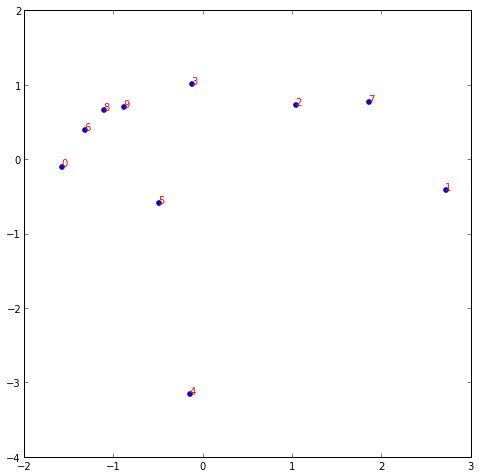

In [4]:
from sklearn.decomposition import PCA
pca = PCA(2)
lo = pca.fit_transform(prototypes.reshape(10,-1))
plot(lo[:,0],lo[:,1],'bo',markersize=5)
for i in range(10): annotate(str(i),xy=lo[i],color='r')

Now we add noise to corrupt these samples.


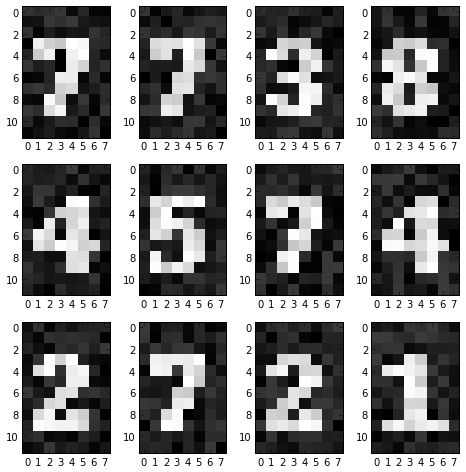

In [5]:
data = []
for i in range(1000):
    p = 1.0*pyrandom.choice(prototypes)
    p += 0.3*rand(*p.shape)
    data.append(p)
data = array(data)
# corrupted prototypes
for i,p in enumerate(data[:12]): subplot(3,4,i+1); imshow(p)

The projected prototypes have now turned into clusters.

These clusters have an approximately normal distribution, since the PCA process essentially just adds up a lot of random variables.

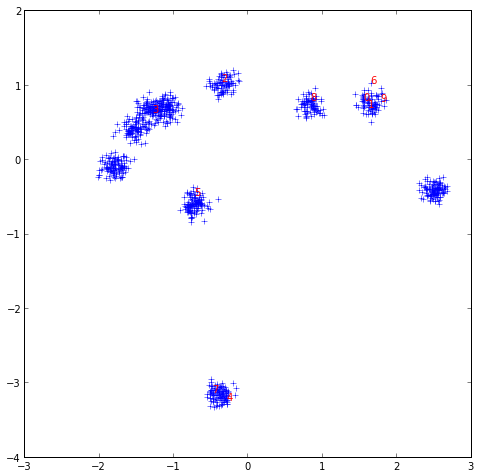

In [6]:
lo = pca.transform(data.reshape(len(data),-1))
plot(lo[:,0],lo[:,1],'b+')
for i in range(10): annotate(str(i),xy=lo[i],color='r')

# Clusters in Real Data

Let's also apply clustering to real data, the MNIST digits.



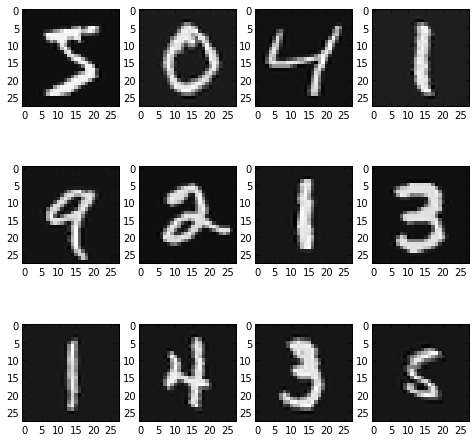

In [7]:
# loading MNIST digits
import tables
with tables.openFile("mnist.h5","r") as mnist:
    images = array(mnist.root.deskewed,'f')
    labels = array(mnist.root.labels,'i')
    test_images = array(mnist.root.test_deskewed,'f')
    test_labels = array(mnist.root.test_labels,'i')
for i,p in enumerate(images[:12]): subplot(3,4,i+1); imshow(p)

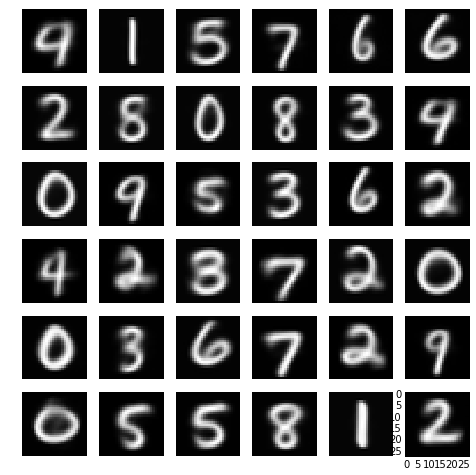

In [8]:
# k-means clusering of MNIST digits
from sklearn.cluster import KMeans,MiniBatchKMeans
km = MiniBatchKMeans(n_clusters=36)
data = images.reshape(len(images),-1)
km.fit(data)
centers = km.cluster_centers_.reshape(36,28,28)
for i in range(36): axis("off"); subplot(6,6,i+1); imshow(centers[i])

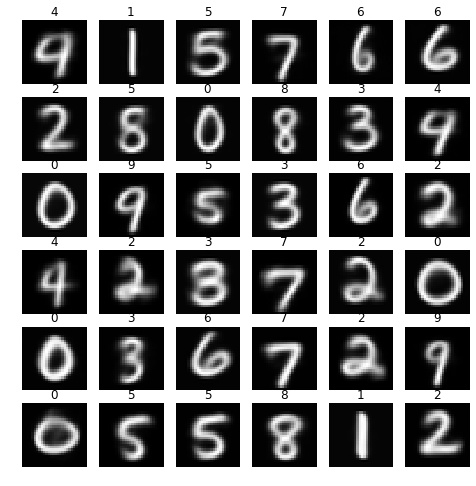

In [9]:
# assigning most frequent classes to clusters
from collections import Counter
closest = km.predict(data)
bycenter = [[i for i,j in enumerate(closest) if j==c] for c in range(len(centers))]
classes = [[labels[l] for l in c] for c in bycenter]
mostcommon = [Counter(l).most_common(1)[0][0] for l in classes]
for i in range(36): subplot(6,6,i+1); imshow(centers[i]); title(str(mostcommon[i])); axis("off")

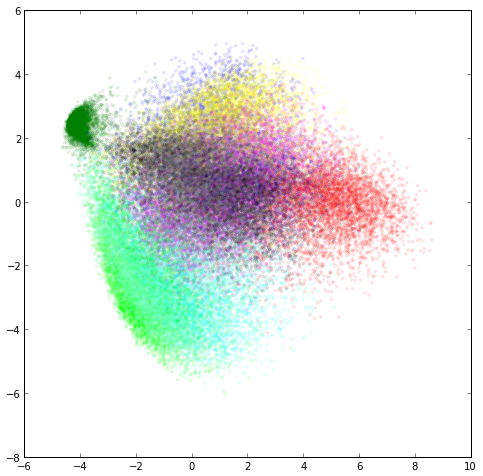

In [10]:
# low-dimensional projection
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(2)
lo = pca.fit_transform(data.reshape(len(data),-1))
colors = "red green blue yellow cyan magenta black lime gray aquamarine".split()
for i in range(10):
    b = (labels==i)
    plot(lo[b,0],lo[b,1],'.',color=colors[i],alpha=0.1)